## Script to Generate Successful Episode Trajectory Graph

In [1]:
#Import libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns; sns.set()
sns.set(style="dark")
import pandas as pd

In [2]:
sns.__version__

'0.9.0'

In [3]:
#Create a list of all file names

#Set folder directory here
#filenames_list = sorted(glob.glob('her_throw1g_log/steps/*monitor.csv'))
filenames_list = sorted(glob.glob('../her_throw1_playback/steps/*monitor.csv'))
print('Length of file: ',len(filenames_list)) 
print(filenames_list[500])

Length of file:  28256
../her_throw1_playback/steps/000000000500.monitor.csv


In [4]:
#Open particular files from filenames_list


# with open(filenames_list[0]) as csv_file:
#     episodeMTX = list(csv.reader(csv_file, delimiter=','))
# del episodeMTX[:2]

In [6]:
#Iterate over all steps in all episodes and collect data
 
rewardVEC=[]
timeSTEPS=[]
isSUCCESS = []
xDISTANCE=[]
isGrabVEC=[]
highRewardList=[]

for file in range(len(filenames_list)):
    
    with open(filenames_list[file]) as csv_file:
        episodeMTX = list(csv.reader(csv_file, delimiter=','))
    del episodeMTX[:2]
    

    #Define traits to be collected
    distBoxGripper=[]
    distBoxGoal=[]
    isGrab = []
    reward = 0
    time_steps_grip=0
    movedWoGrab = []
    is_grab=0
    step_count=0
    


    #Iterate over each episode and collect required data
    for step in episodeMTX:
        
        step_count+=1



        dist_box_gripper = ((np.double(step[8])-np.double(step[5]))**2 + (np.double(step[9])-np.double(step[6]))**2 + (np.double(step[10])-np.double(step[7]))**2)**0.5
        distBoxGripper.append(dist_box_gripper)

#         if dist_box_gripper<0.05: #CHANGE LIMIT
        if np.double(step[1])==1:
            time_steps_grip+=1


        dist_box_goal = ((np.double(step[8])-np.double(step[11]))**2 + (np.double(step[9])-np.double(step[12]))**2 + (np.double(step[10])-np.double(step[13]))**2)**0.5
        distBoxGoal.append(dist_box_goal)

        if (np.double(step[1])==1):
            is_grab=1
            
            
        isGrab.append(np.double(step[1]))

        reward+=np.double(step[3])

        moved_wo_grab = np.double(step[2])
        movedWoGrab.append(moved_wo_grab)

        x_dist=np.double(step[11])
        
        if step_count==60:
            reward_at_last_step= np.double(step[3])
        

#     if reward==(-60):
#         isSUCCESS.append(0.0)
#     else:
#         isSUCCESS.append(1.0)

    if reward==(-60):
        continue
    else:
        
        if (reward_at_last_step==0):
    
            timeSTEPS.append(time_steps_grip)

            rewardVEC.append(reward)

            xDISTANCE.append(x_dist)

            isGrabVEC.append(is_grab)

            if reward>(-15): #Condition for defining a 'good' reward (currently set to >-15)
                highRewardList.append(file)


print('Done')

#Substract 1 from all elements from x_distance list
xDISTANCE[:] = [x - 1 for x in xDISTANCE]

print('Done')

Done
Done


In [15]:
# print(isSUCCESS)
# print(timeSTEPS)
print(len(rewardVEC))

11280


In [8]:
#Accuracy

if (len(timeSTEPS)==len(rewardVEC)) and (len(rewardVEC)==len(xDISTANCE)):
    print('Successful Tasks: ', len(rewardVEC), '\nTotal Tasks: ', len(filenames_list))
    accuracy = len(rewardVEC)*100/len(filenames_list)
    print('Accuracy: ', accuracy, '%')

Successful Tasks:  11280 
Total Tasks:  28256
Accuracy:  39.92072480181201 %


In [14]:
#Create a list of files which have a high reward

print(highRewardList)
print("Length of High Reward List: ", len(highRewardList))
#np.save('../outputs/highRewardList.npy',highRewardList)

[0, 3, 5, 7, 27, 33, 36, 39, 47, 50, 54, 63, 89, 111, 115, 116, 136, 145, 146, 148, 149, 154, 196, 199, 214, 216, 221, 223, 227, 233, 251, 253, 254, 269, 274, 280, 282, 286, 288, 298, 312, 323, 324, 335, 345, 367, 383, 391, 419, 458, 461, 470, 481, 484, 490, 495, 507, 539, 552, 554, 558, 568, 572, 576, 578, 588, 593, 597, 607, 618, 633, 637, 641, 662, 667, 680, 684, 690, 711, 721, 722, 733, 735, 736, 740, 754, 756, 759, 761, 767, 768, 773, 777, 785, 791, 811, 823, 830, 835, 840, 845, 856, 859, 869, 884, 885, 894, 898, 904, 906, 915, 922, 928, 941, 946, 953, 970, 982, 984, 985, 999, 1003, 1007, 1010, 1011, 1014, 1025, 1042, 1043, 1045, 1048, 1056, 1058, 1067, 1095, 1098, 1103, 1109, 1116, 1118, 1120, 1124, 1131, 1136, 1148, 1149, 1158, 1166, 1167, 1192, 1198, 1229, 1246, 1252, 1258, 1264, 1277, 1285, 1289, 1295, 1299, 1304, 1318, 1336, 1342, 1350, 1363, 1368, 1373, 1380, 1381, 1383, 1392, 1407, 1410, 1412, 1423, 1424, 1426, 1432, 1443, 1446, 1447, 1452, 1461, 1472, 1478, 1489, 1490, 149

<function matplotlib.pyplot.plot>

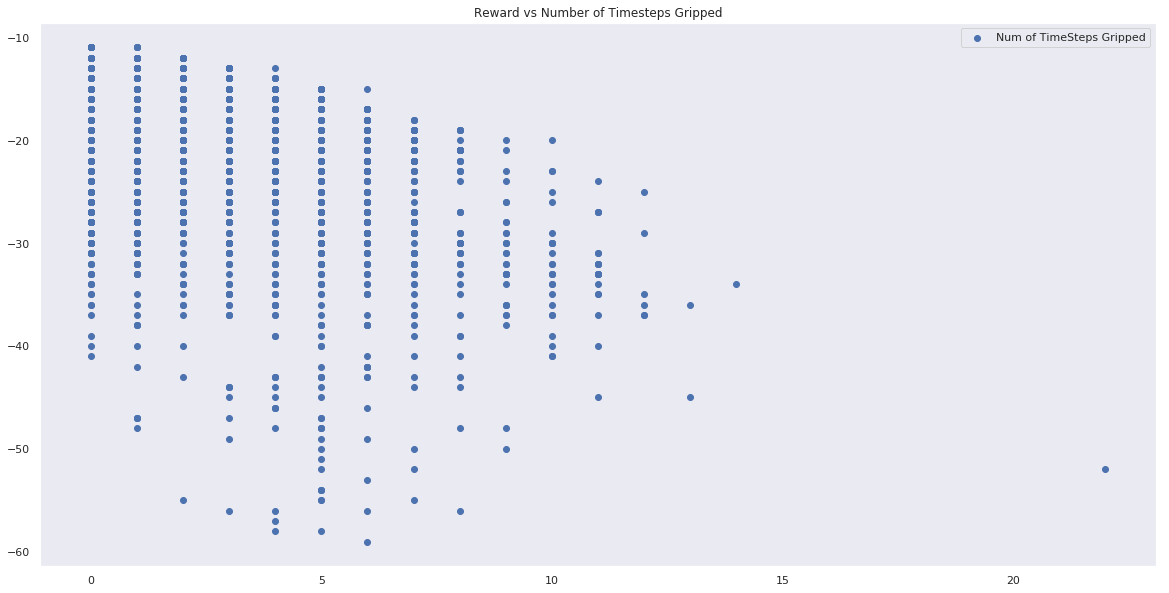

In [10]:
#Plot num_of_timesteps_grab vs reward
plt.figure(figsize=(20,10))
plt.scatter(timeSTEPS,rewardVEC)
plt.legend(('Num of TimeSteps Gripped', 'Episode Reward'))
plt.title('Reward vs Number of Timesteps Gripped')
plt.plot

#Conclusion: 

11280


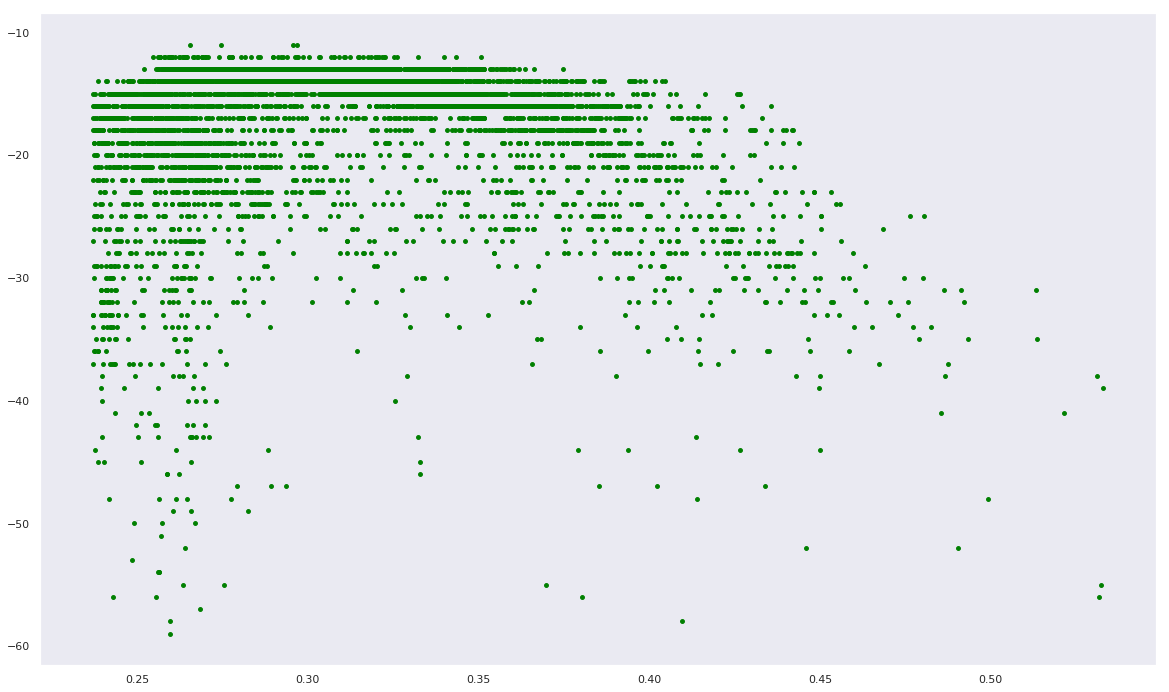

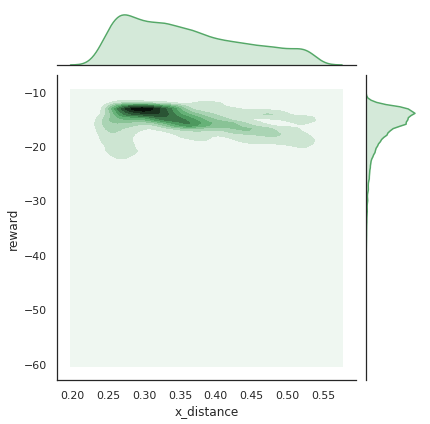

In [11]:
#PLOT 1: Only Grabs

#Plot num_of_timesteps_grab vs reward
plt.figure(figsize=(20,12))
print(len(xDISTANCE))
#print(len(grabVEC))

grabVEC=[]
punchVEC=[]

grab_counter=0

for episode in range(len(xDISTANCE)):
    
    if isGrabVEC[episode]==1:
        g = plt.scatter(xDISTANCE[episode],rewardVEC[episode],c='green',s=15)
        grab_counter+=1
        grabVEC.append(rewardVEC[episode])
        
    else:
        #r = plt.scatter(xDISTANCE[episode],rewardVEC[episode],c='red',s=15)
        punchVEC.append(rewardVEC[episode])
    

# print('No of Grabs: ',grab_counter,'/524')
# print('Percentage of Grabs: ',grab_counter*100/len(xDISTANCE),'%')
# plt.ylabel('Episode Reward',fontsize=25,fontweight='bold')
# plt.xlabel('X Distance of Goal (Mujoco Units)',fontsize=25,fontweight='bold')
# plt.xticks(fontsize=25, rotation=0)
# plt.yticks(fontsize=25, rotation=0)
# #plt.legend((g,r),('Grab','Punch'),loc=1, fontsize=20)
# plt.title('Successful Episodes',fontsize=25,fontweight='bold')
# #plt.text(0,0.8,'Reward: %.1f'%reward, fontsize=25,fontweight='bold')
# plt.savefig('../outputs/RewVsXdist', dpi=600)
# plt.plot

xDistVsReward = pd.DataFrame({'x_distance': xDISTANCE, 'reward': rewardVEC, 'isGrabVEC': isGrabVEC})
with sns.axes_style("white"):
    sns.jointplot(x="x_distance", y="reward", kind='kde', data=xDistVsReward, color="g")
plt.show()


11280


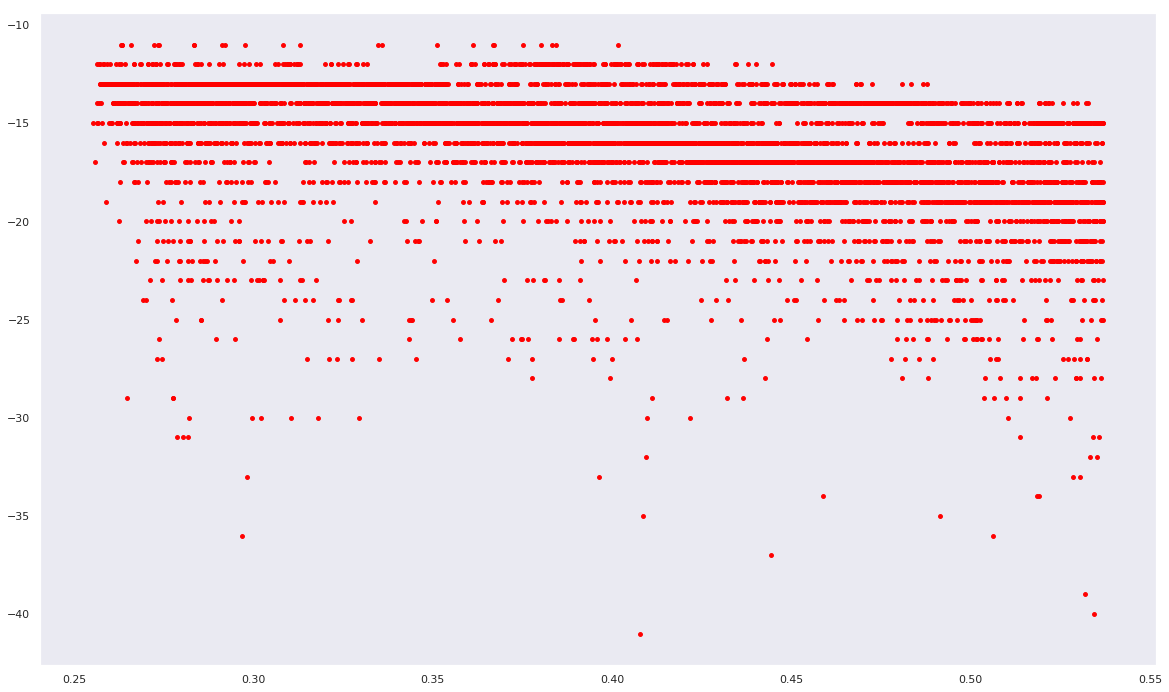

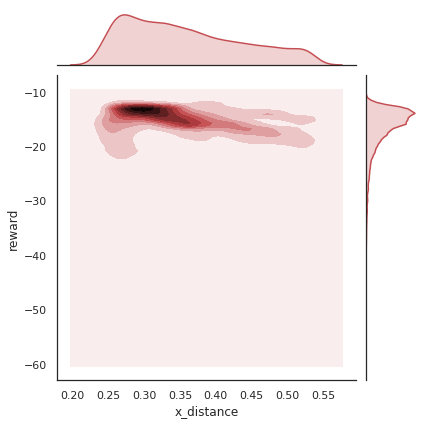

In [16]:
#PLOT 1: Only Punches

#Plot num_of_timesteps_grab vs reward
plt.figure(figsize=(20,12))
print(len(xDISTANCE))
#print(len(grabVEC))

grabVEC=[]
punchVEC=[]

grab_counter=0

for episode in range(len(xDISTANCE)):
    
    if isGrabVEC[episode]==1:
        #g = plt.scatter(xDISTANCE[episode],rewardVEC[episode],c='green',s=15)
        grab_counter+=1
        grabVEC.append(rewardVEC[episode])
        
    else:
        r = plt.scatter(xDISTANCE[episode],rewardVEC[episode],c='red',s=15)
        punchVEC.append(rewardVEC[episode])
    

# print('No of Grabs: ',grab_counter,'/524')
# print('Percentage of Grabs: ',grab_counter*100/len(xDISTANCE),'%')
# plt.ylabel('Episode Reward',fontsize=25,fontweight='bold')
# plt.xlabel('X Distance of Goal (Mujoco Units)',fontsize=25,fontweight='bold')
# plt.xticks(fontsize=25, rotation=0)
# plt.yticks(fontsize=25, rotation=0)
# #plt.legend((g,r),('Grab','Punch'),loc=1, fontsize=20)
# plt.title('Successful Episodes',fontsize=25,fontweight='bold')
# #plt.text(0,0.8,'Reward: %.1f'%reward, fontsize=25,fontweight='bold')
# plt.savefig('RewVsXdist', dpi=600)
# plt.plot

xDistVsReward = pd.DataFrame({'x_distance': xDISTANCE, 'reward': rewardVEC, 'isGrabVEC': isGrabVEC})
with sns.axes_style("white"):
    sns.jointplot(x="x_distance", y="reward", kind='kde', data=xDistVsReward, color="r")
plt.show()


11280
No of Grabs:  5476
Percentage of Grabs:  48.54609929078014 %


<function matplotlib.pyplot.plot>

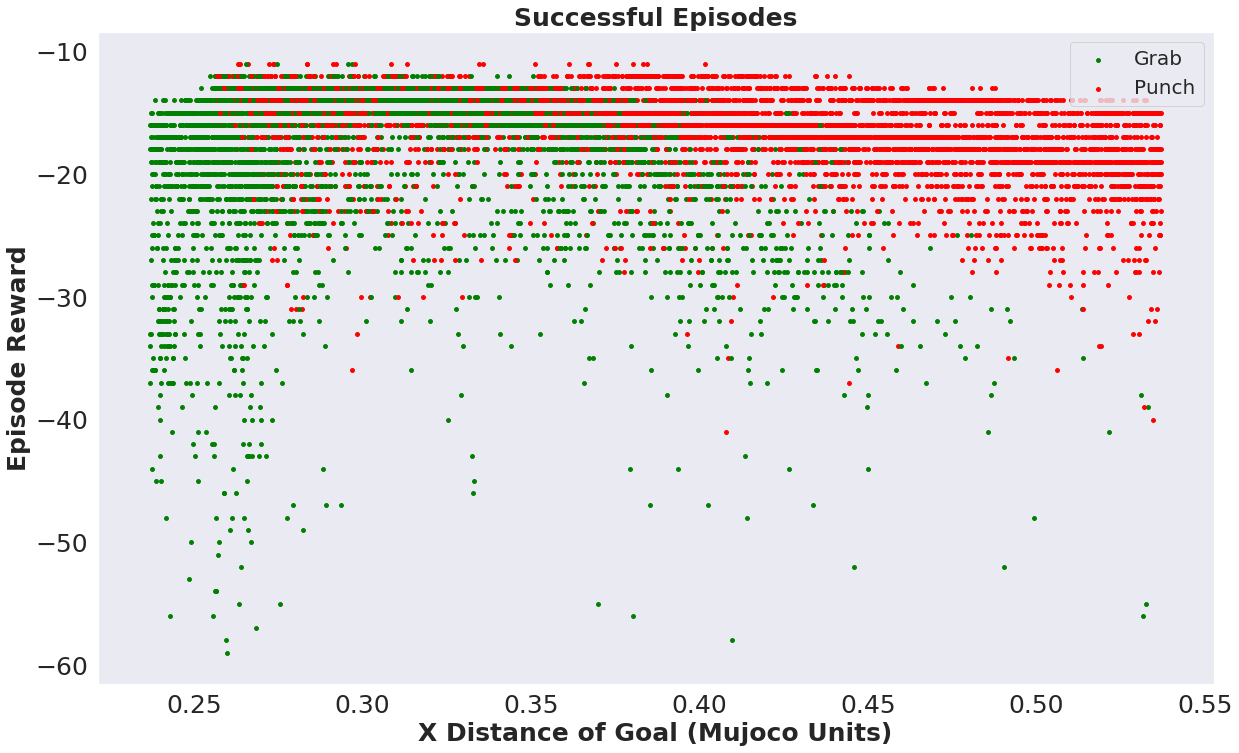

In [17]:
#Plot 3: Grabs and Punches

#Plot num_of_timesteps_grab vs reward
plt.figure(figsize=(20,12))
print(len(xDISTANCE))
#print(len(grabVEC))

grabVEC=[]
punchVEC=[]

grab_counter=0

for episode in range(len(xDISTANCE)):
    
    if isGrabVEC[episode]==1:
        g = plt.scatter(xDISTANCE[episode],rewardVEC[episode],c='green',s=15)
        grab_counter+=1
        grabVEC.append(rewardVEC[episode])
        
    else:
        r = plt.scatter(xDISTANCE[episode],rewardVEC[episode],c='red',s=15)
        punchVEC.append(rewardVEC[episode])
    

print('No of Grabs: ',grab_counter)
print('Percentage of Grabs: ',grab_counter*100/len(xDISTANCE),'%')
plt.ylabel('Episode Reward',fontsize=25,fontweight='bold')
plt.xlabel('X Distance of Goal (Mujoco Units)',fontsize=25,fontweight='bold')
plt.xticks(fontsize=25, rotation=0)
plt.yticks(fontsize=25, rotation=0)
plt.legend((g,r),('Grab','Punch'),loc=1, fontsize=20)
plt.title('Successful Episodes',fontsize=25,fontweight='bold')
#plt.text(0,0.8,'Reward: %.1f'%reward, fontsize=25,fontweight='bold')
plt.savefig('RewVsXdist', dpi=300)
plt.plot



11280
No of Grabs:  5476 /524
Percentage of Grabs:  48.54609929078014 %


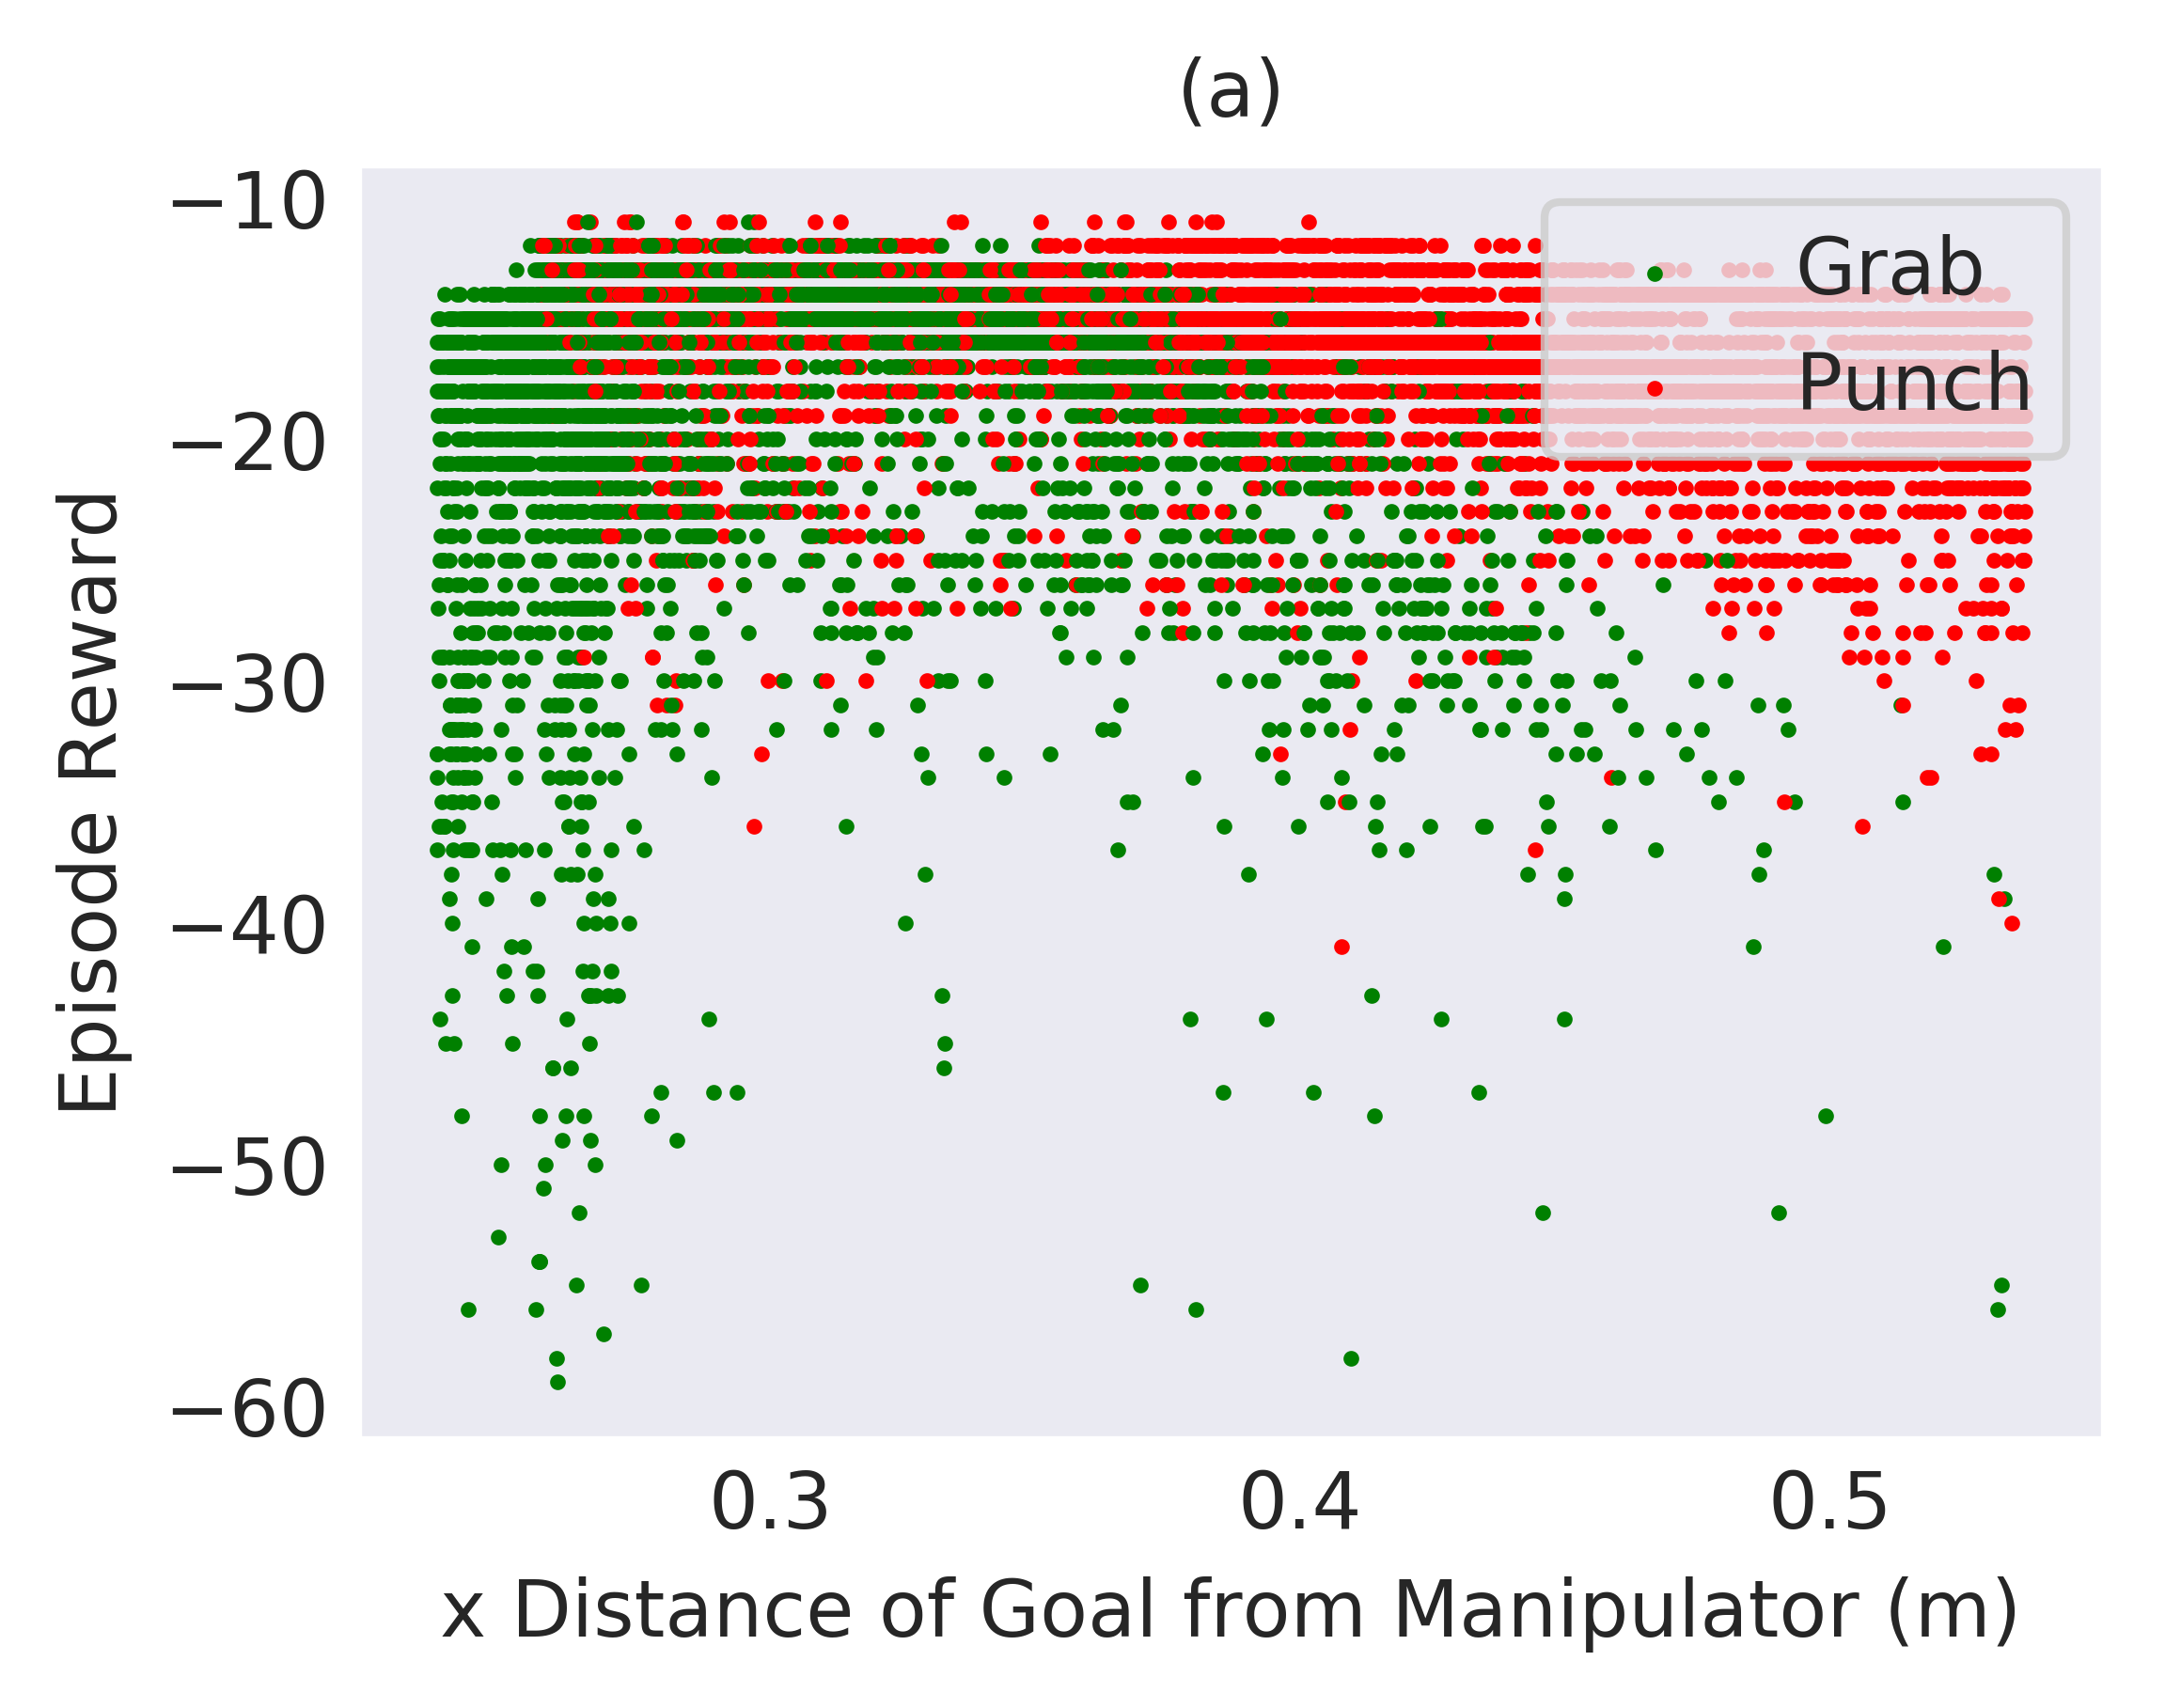

Length of xDISTANCEPunch:  5804
Length of PunchVEC:  5804
Length of xDISTANCEGrab:  5476
Length of GrabVEC:  5476


In [20]:
#Plot Throw vs Grabs - Plot 2 - Similar to the one above

plt.figure(figsize = [4, 3], dpi = 600)
print(len(xDISTANCE))

xDISTANCEGrab=[]
grabVEC=[]

xDISTANCEPunch=[]
punchVEC=[]


grab_counter=0

for episode in range(len(xDISTANCE)):
    
    if isGrabVEC[episode]==1:
        g = plt.scatter(xDISTANCE[episode],rewardVEC[episode],c='green',s=1)
        grab_counter+=1
        xDISTANCEGrab.append(xDISTANCE[episode])
        grabVEC.append(rewardVEC[episode])
        
    else:
        r = plt.scatter(xDISTANCE[episode],rewardVEC[episode],c='red',s=1)
        xDISTANCEPunch.append(xDISTANCE[episode])
        punchVEC.append(rewardVEC[episode])


#fontweight='bold'

print('No of Grabs: ',grab_counter,'/524')
print('Percentage of Grabs: ',grab_counter*100/len(xDISTANCE),'%')

plt.ylabel('Episode Reward'        ,fontsize=10)
plt.xlabel('x Distance of Goal from Manipulator (m)',fontsize=10)

plt.tick_params(direction = 'in')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)

plt.legend((g,r),('Grab','Punch'),loc=1, fontsize=10)
#plt.title('Successful Episodes',fontsize=10)
plt.title('(a)',fontsize=10)

plt.savefig('../variety_list/success_strategy', dpi=600, bbox_inches = 'tight')
plt.show()


print('Length of xDISTANCEPunch: ', len(xDISTANCEPunch))
print('Length of PunchVEC: ', len(punchVEC))
print('Length of xDISTANCEGrab: ', len(xDISTANCEGrab))
print('Length of GrabVEC: ', len(grabVEC))

Length of xDISTANCEPunch:  5804
Length of PunchVEC:  5804


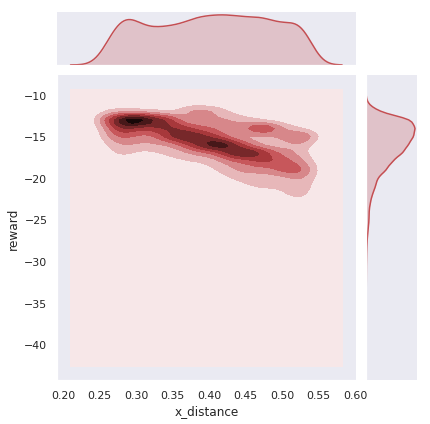

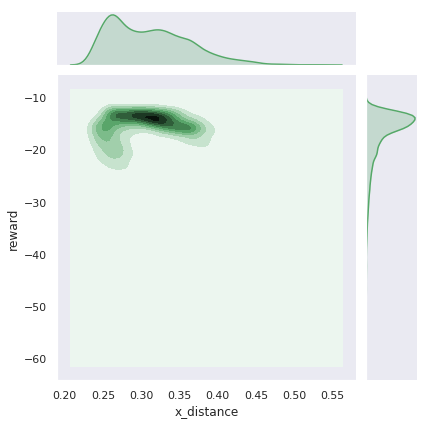

In [21]:
print('Length of xDISTANCEPunch: ', len(xDISTANCEPunch))
print('Length of PunchVEC: ', len(punchVEC))
plt.figure(figsize = [4, 3], dpi = 600)


xDR_punch = pd.DataFrame({'x_distance': xDISTANCEPunch, 'reward': punchVEC})
xDR_grab = pd.DataFrame({'x_distance': xDISTANCEGrab, 'reward': grabVEC})

# with sns.axes_style("white"):
#     sns.jointplot(x="x_distance", y="reward", kind='kde', data=xDR_punch, color="r")
#     sns.jointplot(x="x_distance", y="reward", kind='kde', data=xDR_grab, color="g")
# plt.show()

g = sns.jointplot(x=xDR_punch.x_distance, y=xDR_punch.reward,kind='kde', color='r')
axes = g.ax_joint
sns.jointplot(x="x_distance", y="reward", kind='kde', data=xDR_grab, color="g")
plt.show()

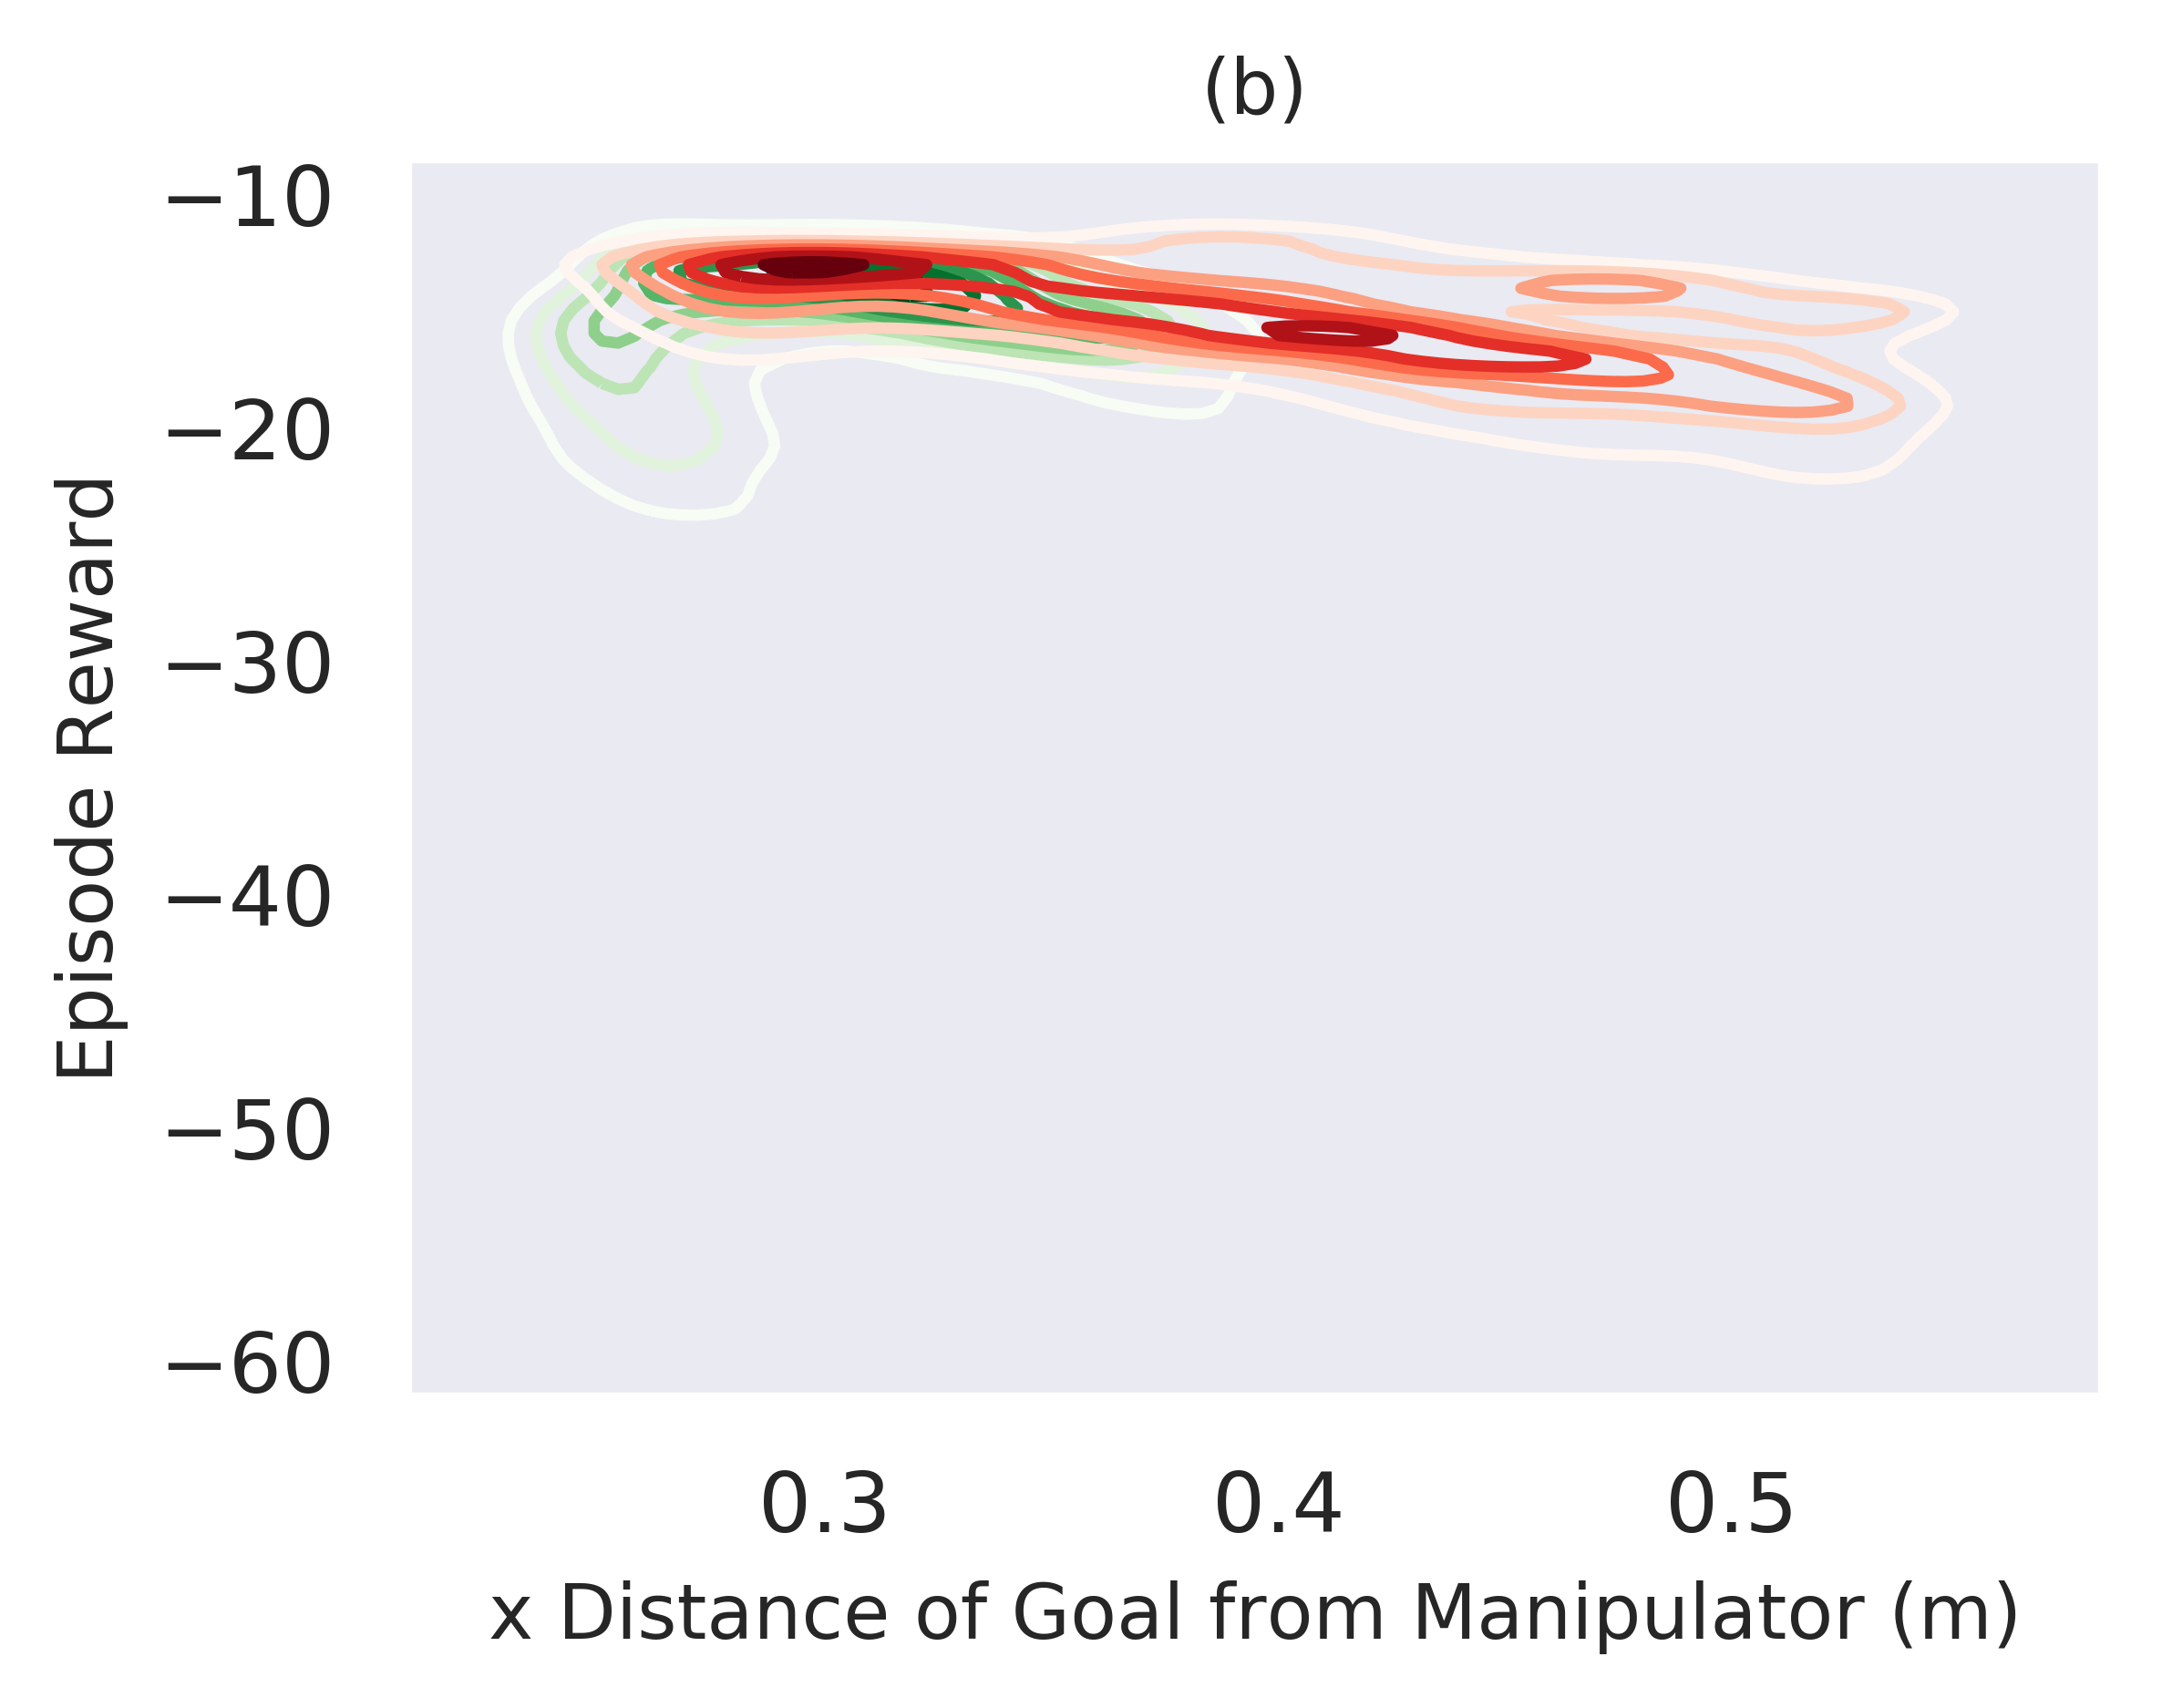

In [22]:
#Dataset
plt.figure(figsize = [4, 3], dpi = 600)
xDistVsReward = pd.DataFrame({'x_distance': xDISTANCE, 'reward': rewardVEC, 'isGrabVEC': isGrabVEC})    
grab = xDistVsReward.loc[xDistVsReward.isGrabVEC == 1]
punch = xDistVsReward.loc[xDistVsReward.isGrabVEC == 0]
ax = sns.kdeplot(grab.x_distance, grab.reward, cmap="Greens", shade_lowest=True)
ax = sns.kdeplot(punch.x_distance, punch.reward, cmap="Reds",  shade_lowest=False)
plt.xlabel('x Distance of Goal from Manipulator (m)', fontsize=10)
plt.ylabel('Episode Reward', fontsize=10)
plt.title('(b)',fontsize=10)
plt.savefig('../variety_list/success_strategy2', dpi=600, bbox_inches = 'tight')
plt.show()

In [23]:
print(len(xDISTANCE))
print(len(rewardVEC))

11280
11280


In [ ]:
#Plot 3: Grabs and Punches, but using Seaborn Package

#Plot num_of_timesteps_grab vs reward



# for episode in range(len(xDISTANCE)):
    
#     if isGrabVEC[episode]==1:
#         g = plt.scatter(xDISTANCE[episode],rewardVEC[episode],c='green',s=15)
#         grab_counter+=1
#         grabVEC.append(rewardVEC[episode])
        
#     else:
#         r = plt.scatter(xDISTANCE[episode],rewardVEC[episode],c='red',s=15)
#         punchVEC.append(rewardVEC[episode])
plt.figure(figsize=(20,12))
xDistVsReward = pd.DataFrame({'x_distance': xDISTANCE, 'reward': rewardVEC, 'isGrabVEC': isGrabVEC})    
sns.lmplot("x_distance", "reward", data=xDistVsReward, hue='isGrabVEC',palette="bright", fit_reg=False, size=8, aspect=1.65)

ValueError: Could not interpret input 'xDISTANCE'

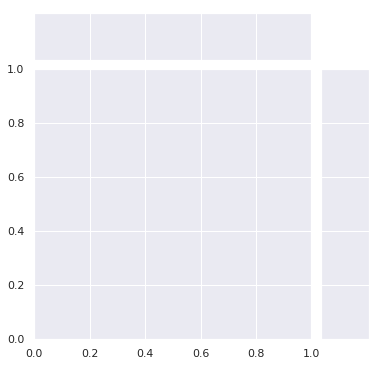

In [18]:
plt.figure(figsize=(20,12))
xDistVsReward = pd.DataFrame({'x_distance': xDISTANCE, 'reward': rewardVEC, 'isGrabVEC': isGrabVEC})    
sns.jointplot(x="xDISTANCE", y="rewardVEC", data=xDistVsReward, kind="kde");

In [15]:
#Create and Export dataset:

xDISTANCE = np.array(xDISTANCE)
rewardVEC = np.array(rewardVEC)
isGrabVec = np.array(isGrabVEC)

datasetDistReward = np.column_stack((xDISTANCE,rewardVEC,isGrabVEC))

#Small Dataset
#np.save('datasetDistReward.npy',datasetDistReward)

#Large Dataset - 28k
np.save('datasetDistReward28k.npy',datasetDistReward)

<function matplotlib.pyplot.plot>

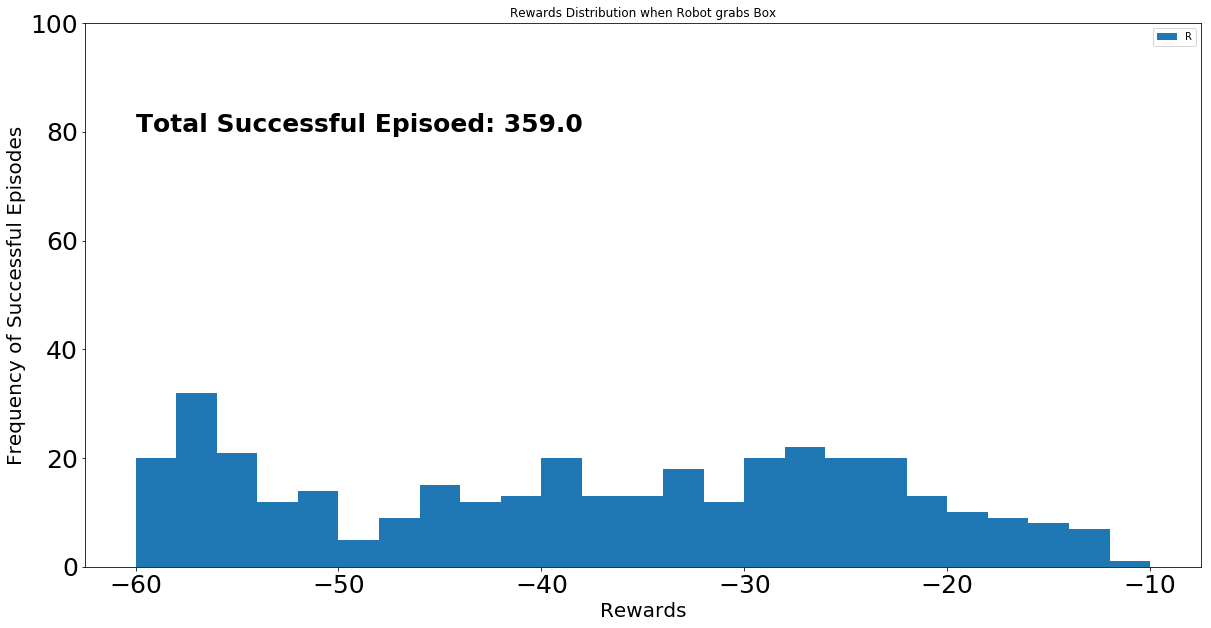

In [524]:
plt.figure(figsize=(20,10))
plt.hist(grabVEC,bins=[-60,-58,-56,-54,-52,-50,-48,-46,-44,-42,-40,-38,-36,-34,-32,-30,-28,-26,-24,-22,-20,-18,-16,-14,-12,-10])
plt.ylabel('Frequency of Successful Episodes', fontsize=20, fontweight=3)
plt.xlabel('Rewards',fontsize=20, fontweight=3)
plt.xticks(fontsize=25, rotation=0)
plt.yticks(fontsize=25, rotation=0)
plt.ylim(0,100)
plt.legend('Robot Grabs Box')
plt.title('Rewards Distribution when Robot grabs Box')
plt.text(-60,80,'Total Successful Episoed: %.1f'%len(grabVEC), fontsize=25,fontweight='bold')
plt.plot

In [511]:
# plt.figure(figsize=(20,10))
# plt.hist(punchVEC)
# plt.ylabel('Frequency of Successful Episodes')
# plt.xlabel('Rewards')
# plt.ylim(0,100)
# plt.legend('Robot Punches Box')
# plt.title('Rewards Distribution when Robot Punches Box')
# plt.plot